# TASK 3: USER EXPERIENCE ANALYSIS

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import plotter
from assistant_functions import Assistants
from cleaner import CleanTelecomData

#### Load the dataset into the workspace

In [4]:
assistant = Assistants()
df = assistant.read_csv(csv_path = "../data/clened_data.csv")

file read as csv


In [5]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [6]:
user_experience_df = df[['msisdn/number', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 
           'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
           'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
           'handset_type']]

In [7]:
user_experience_df.head()

,msisdn/number,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),handset_type
0,3.366496e+10,42.000000,5.000000,23.0,44.0,2.105238e+07,772902.274842,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,16.0,26.0,2.105238e+07,772902.274842,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,Samsung Galaxy A8 (2018)
3,3.375034e+10,105.959783,17.633655,44.0,44.0,2.105238e+07,772902.274842,undefined
4,3.369980e+10,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,Samsung Sm-G390F


### Handle outliers

In [10]:
# Handle the outliers present in the data using the handle_outliers method in the assistant_functions module

treated_user_experience = assistant.handle_outliers_with_mode(user_experience_df, 'avg_rtt_dl_(ms)', method = "mean")
treated_user_experience = assistant.handle_outliers_with_mode(user_experience_df, 'avg_rtt_ul_(ms)', method = "mean")

treated_user_experience = assistant.handle_outliers_with_mode(user_experience_df, 'avg_bearer_tp_dl_(kbps)', method = "mean")
treated_user_experience = assistant.handle_outliers_with_mode(user_experience_df, 'avg_bearer_tp_ul_(kbps)', method = "mean")

treated_user_experience = assistant.handle_outliers_with_mode(user_experience_df, 'tcp_ul_retrans._vol_(bytes)', method = "mean")
treated_user_experience = assistant.handle_outliers_with_mode(user_experience_df, 'tcp_dl_retrans._vol_(bytes)', method = "mean")

### Introduce a new data frame to accommodate the aggregate values related to
#### *Average TCP retransmission
#### *Average RTT
#### *Handset type
#### *Average throughput


In [12]:
# Aggregating the user experience descriptors in to one data frame
user_experience_metrics_df = pd.DataFrame(columns = ['msisdnum','tcp_retrans_bytes','average_rtt_ms','handset_type','avarage_throughput_kbps'])
user_experience_metrics_df['tcp_retrans_bytes'] = treated_user_experience['tcp_ul_retrans._vol_(bytes)'] + treated_user_experience['tcp_dl_retrans._vol_(bytes)']
user_experience_metrics_df['average_rtt_ms'] = treated_user_experience['avg_rtt_dl_(ms)'] + treated_user_experience['avg_rtt_ul_(ms)']
user_experience_metrics_df['handset_type'] = treated_user_experience['handset_type']
user_experience_metrics_df['avarage_throughput_kbps'] = treated_user_experience['avg_bearer_tp_dl_(kbps)'] + treated_user_experience['avg_bearer_tp_ul_(kbps)']
user_experience_metrics_df['msisdnum'] = treated_user_experience['msisdn/number']

In [13]:
user_experience_metrics_df.head()

,msisdnum,tcp_retrans_bytes,average_rtt_ms,handset_type,avarage_throughput_kbps
0,3.366496e+10,2.182528e+07,47.000000,Samsung Galaxy A5 Sm-A520F,67.0
1,3.368185e+10,2.182528e+07,70.000000,Samsung Galaxy J5 (Sm-J530),42.0
2,3.376063e+10,2.182528e+07,123.593439,Samsung Galaxy A8 (2018),15.0
3,3.375034e+10,2.182528e+07,123.593439,undefined,88.0
4,3.369980e+10,2.182528e+07,123.593439,Samsung Sm-G390F,15.0


#### Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
#### >>Average TCP retransmission
#### >>Average RTT
#### >>Handset type
#### >>Average throughput

In [35]:
user_expericence_aggregate = user_experience_metrics_df.groupby('msisdnum').agg({'average_rtt_ms': 'sum',
                                                                          'avarage_throughput_kbps': 'sum',
                                                                          'tcp_retrans_bytes': 'sum', 
                                                                           'handset_type': lambda x: x.mode()[0]})

In [37]:
user_expericence_aggregate = assistant.handle_outliers_with_mode(user_expericence_aggregate, 'average_rtt_ms', method="mean")

user_expericence_aggregate = assistant.handle_outliers_with_mode(user_expericence_aggregate, 'avarage_throughput_kbps', method="mean")

user_expericence_aggregate = assistant.handle_outliers_with_mode(user_expericence_aggregate, 'tcp_retrans_bytes', method="mean")

In [38]:
user_expericence_aggregate.head()

,average_rtt_ms,avarage_throughput_kbps,tcp_retrans_bytes,handset_type
msisdnum,,,,
3.360100e+10,46.000000,76.0,2.182528e+07,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,31.000000,99.0,2.182528e+07,Apple iPhone 7 (A1778)
3.360100e+10,123.593439,97.0,2.182528e+07,undefined
3.360101e+10,84.000000,248.0,7.739683e+05,Apple iPhone 5S (A1457)
3.360101e+10,119.000000,56844.0,3.119611e+07,Apple iPhone Se (A1723)


In [40]:
user_expericence_aggregate.describe()

,average_rtt_ms,avarage_throughput_kbps,tcp_retrans_bytes
count,105719.000000,105719.000000,1.057190e+05
mean,101.133200,11119.476911,1.844254e+07
std,60.771090,16439.290307,1.190691e+07
min,0.000000,0.000000,9.700000e+01
25%,47.000000,97.000000,6.899479e+06
50%,92.000000,302.000000,2.182528e+07
75%,138.000000,21130.226525,2.182528e+07
max,274.186877,66825.000000,4.421086e+07


### Compute & list 10 of the top, bottom and most frequent:
##### a) TCP values in the dataset.


In [43]:
tcp_values_df = user_experience_metrics_df.sort_values(by = ['tcp_retrans_bytes'], ascending=False)

# TOP 10 TCP VALUES IN THE DATASET
top_10_tcp = tcp_values_df.head(10)

# BOTTOM 10 TCP VALUES IN THE DATASET
bottom_10_tcp = tcp_values_df.tail(10)

# MOST FREQUENT TCP 
most_frq_tcp = tcp_values_df['tcp_retrans_bytes'].value_counts().head()

###### TOP 10 TCP VALUES IN THE DATASET

In [44]:
top_10_tcp[['tcp_retrans_bytes']]

,tcp_retrans_bytes
34986,2.913408e+09
74941,2.639770e+09
65724,2.464814e+09
1465,2.260712e+09
130390,1.772436e+09
33938,1.748862e+09
139207,1.239951e+09
139416,7.949480e+08
64506,7.406242e+08
1346,5.293231e+08


###### BOTTOM 10 TCP VALUES IN THE DATASET

In [45]:
bottom_10_tcp[['tcp_retrans_bytes']]

,tcp_retrans_bytes
12477,143.0
93685,134.0
81400,134.0
97528,129.0
8580,128.0
94746,113.0
12759,108.0
17773,106.0
108566,97.0
140565,86.0


###### MOST FREQUENT TCP VALUES

In [46]:
most_frq_tcp

2.182528e+07    83580
2.105367e+07      649
7.742323e+05      245
2.105371e+07      235
7.729403e+05      136
Name: tcp_retrans_bytes, dtype: int64

###### b) RTT values in the dataset

In [47]:
rtt_values_df = user_experience_metrics_df.sort_values(by = ['average_rtt_ms'], ascending=False)

# TOP 10 TCP VALUES IN THE DATASET
top_10_rtt = rtt_values_df.head(10)

# BOTTOM 10 TCP VALUES IN THE DATASET
bottom_10_rtt = rtt_values_df.tail(10)

# MOST FREQUENT TCP 
most_frq_rtt = rtt_values_df['average_rtt_ms'].value_counts().head()

###### TOP 10 RTT VALUES IN THE DATASET

In [48]:
top_10_rtt[['average_rtt_ms']]

,average_rtt_ms
29042,96924.0
28805,64641.0
5842,54848.0
21936,27278.0
22501,26300.0
1338,25922.0
79480,25715.0
94993,25388.0
98144,24738.0
95562,20980.0


###### BOTTOM 10 RTT VALUES IN THE DATASET

In [51]:
bottom_10_rtt[['average_rtt_ms']]

,average_rtt_ms
120440,6.0
8542,6.0
101076,5.0
141887,4.0
49585,4.0
70123,2.0
41313,0.0
121759,0.0
140847,0.0
100853,0.0


###### MOST FREQUENT RTT VALUES

In [52]:
most_frq_rtt

123.593439    26118
29.000000      4987
39.000000      4205
38.000000      2755
40.000000      2635
Name: average_rtt_ms, dtype: int64

###### c) Throughput values in the dataset.

In [53]:
throughput_df = user_experience_metrics_df.sort_values(by = ['avarage_throughput_kbps'], ascending=False)

# TOP 10 TCP VALUES IN THE DATASET
top_10_throughput = throughput_df.head(10)

# BOTTOM 10 TCP VALUES IN THE DATASET
bottom_10_throughput = throughput_df.tail(10)

# MOST FREQUENT TCP 
most_frq_throughput = throughput_df['avarage_throughput_kbps'].value_counts().head()

###### TOP 10 THROUGHPUT VALUES IN THE DATASET

In [55]:
top_10_throughput[['avarage_throughput_kbps']]

,avarage_throughput_kbps
118147,382262.0
140640,313244.0
138247,304299.0
89224,300546.0
114151,283931.0
138445,281144.0
146516,277152.0
90071,276205.0
113912,274052.0
115115,269888.0


###### BOTTOM 10 THROUGHPUT VALUES IN THE DATASET

In [56]:
bottom_10_throughput[['avarage_throughput_kbps']]

,avarage_throughput_kbps
2418,0.0
9113,0.0
99055,0.0
13595,0.0
19740,0.0
23546,0.0
20378,0.0
65362,0.0
105952,0.0
131008,0.0


###### MOST FREQUENT THROUGHPUT VALUES

In [57]:
most_frq_throughput

63.0    3884
15.0    3678
97.0    1945
90.0    1882
98.0    1799
Name: avarage_throughput_kbps, dtype: int64

#### Compute & report:
###### d)The distribution of the average throughput  per handset type and provide interpretation for your findings.

In [59]:
aggregate_throughput_per_handset = user_experience_metrics_df.groupby('handset_type').agg({'avarage_throughput_kbps': 'sum', 'tcp_retrans_bytes': 'sum'})
sorted_aggregate_throughput_per_handset = user_experience_metrics_df.sort_values(by = ['avarage_throughput_kbps'], ascending = False).head(10)

handset_throghput_df = sorted_aggregate_throughput_per_handset[['avarage_throughput_kbps']]
handset_tp_df['handset_type'] = sorted_aggregate_throughput_per_handset.index

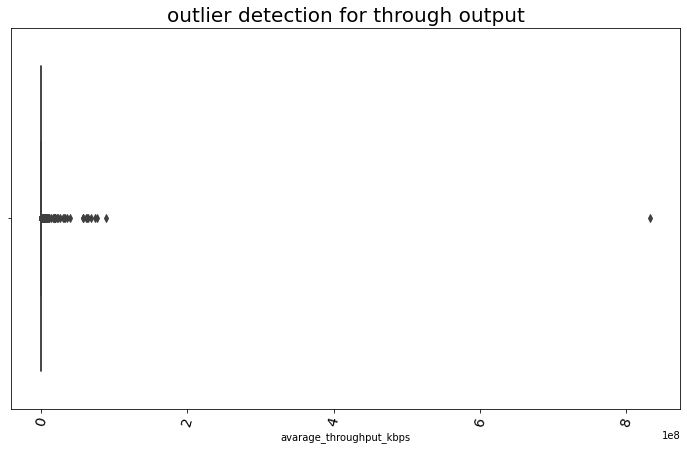

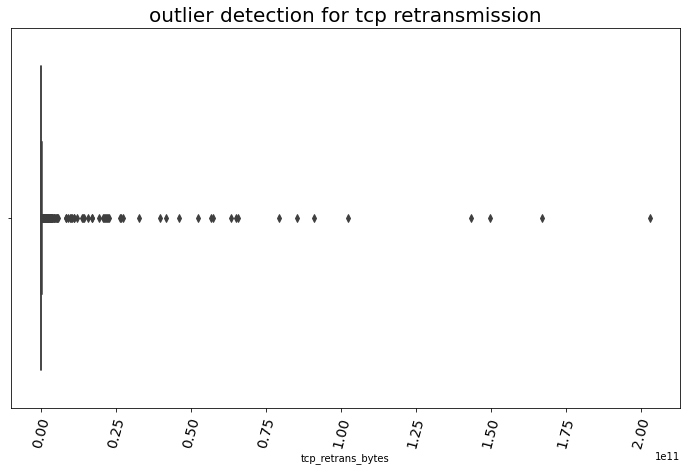

In [61]:
plotter.plot_box(aggregate_throughput_per_handset, 'avarage_throughput_kbps', 'outlier detection for through output')
plotter.plot_box(aggregate_throughput_per_handset, 'tcp_retrans_bytes', 'outlier detection for tcp retransmission')

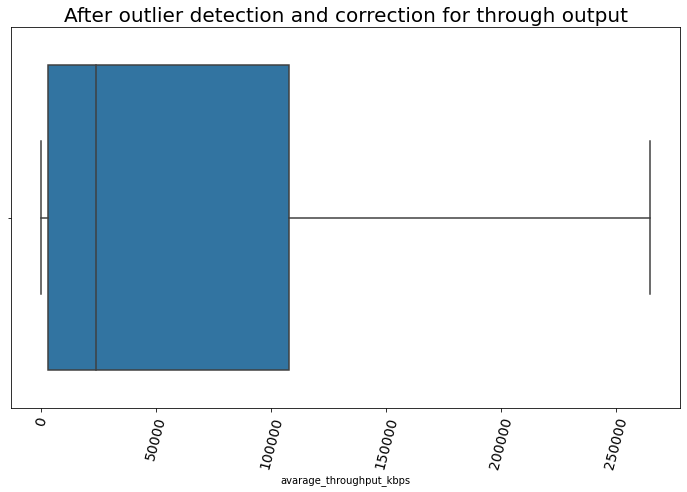

In [64]:
# The box plots above show that both avarage_throughput_kbps and tcp_retrans_bytes both involve outliers which need to be handelled
cleaned_aggregate_throughput_per_handset = assistant.handle_outliers(aggregate_throughput_per_handset, 'avarage_throughput_kbps')

plotter.plot_box(cleaned_aggregate_throughput_per_handset, 'avarage_throughput_kbps', 'After outlier detection and correction for through output')

<Figure size 648x504 with 0 Axes>

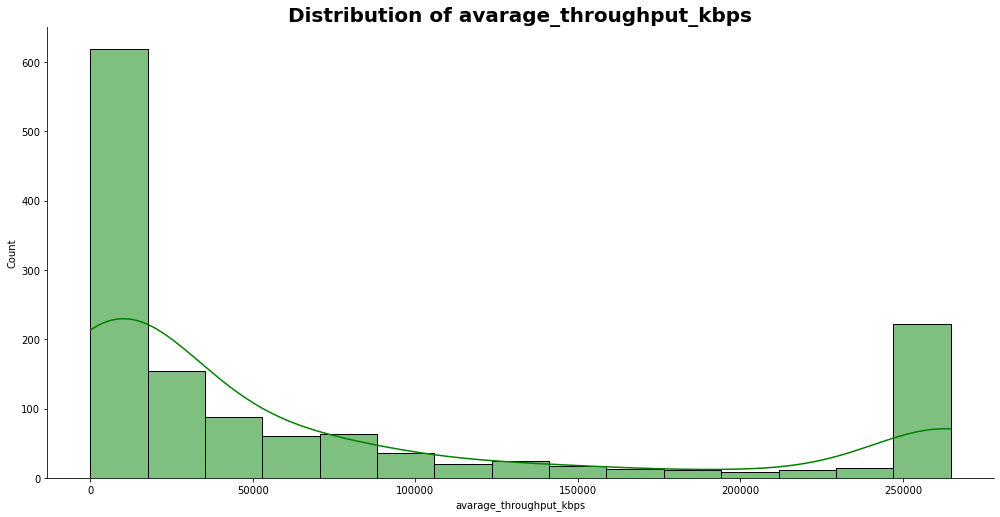

,avarage_throughput_kbps,tcp_retrans_bytes
count,1363.000000,1.363000e+03
mean,74362.737344,1.603788e+09
std,96691.728868,1.142009e+10
min,0.000000,3.600000e+02
25%,3041.500000,1.225554e+06
50%,23669.000000,2.182528e+07
75%,107681.500000,6.632693e+07
max,264641.500000,2.029291e+11


In [67]:
plotter.plot_hist(cleaned_aggregate_throughput_per_handset, 'avarage_throughput_kbps', 'green')
cleaned_aggregate_throughput_per_handset.describe()

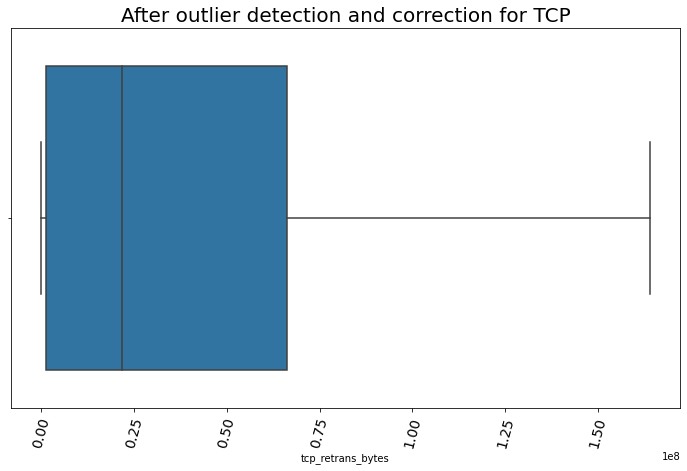

In [68]:
# The box plots above show that both avarage_throughput_kbps and tcp_retrans_bytes both involve outliers which need to be handelled
cleaned_aggregate_throughput_per_handset = assistant.handle_outliers(aggregate_throughput_per_handset, 'tcp_retrans_bytes')

plotter.plot_box(cleaned_aggregate_throughput_per_handset, 'tcp_retrans_bytes', 'After outlier detection and correction for TCP')

<Figure size 648x504 with 0 Axes>

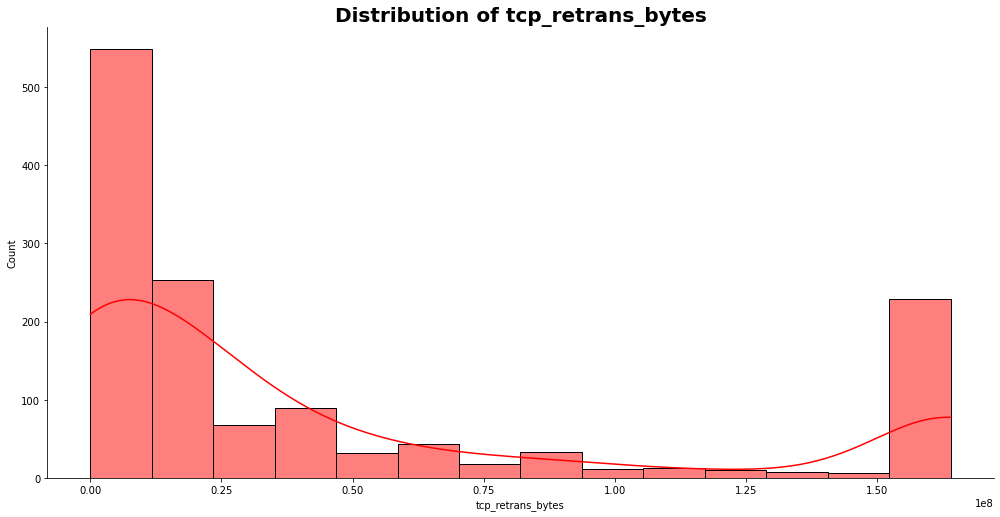

,avarage_throughput_kbps,tcp_retrans_bytes
count,1.363000e+03,1.363000e+03
mean,1.638934e+06,4.701542e+07
std,2.336493e+07,5.925214e+07
min,0.000000e+00,3.600000e+02
25%,3.041500e+03,1.225554e+06
50%,2.366900e+04,2.182528e+07
75%,1.076815e+05,6.632693e+07
max,8.324429e+08,1.639790e+08


In [70]:
plotter.plot_hist(cleaned_aggregate_throughput_per_handset, 'tcp_retrans_bytes', 'red')
cleaned_aggregate_throughput_per_handset.describe()

##### Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [72]:
# Normalization
experience_metrics_per_user = user_experience_metrics_df[['average_rtt_ms','avarage_throughput_kbps','tcp_retrans_bytes']]

In [73]:
experience_metrics_per_user_clean = experience_metrics_per_user.copy()

# Handle Outliers
experience_metrics_per_user_clean = assistant.handle_outliers_with_mode(experience_metrics_per_user_clean,'average_rtt_ms','mean')
experience_metrics_per_user_clean = assistant.handle_outliers_with_mode(experience_metrics_per_user_clean, 'avarage_throughput_kbps', 'mode')
experience_metrics_per_user_clean = assistant.handle_outliers_with_mode(experience_metrics_per_user_clean, 'tcp_retrans_bytes', 'mean')

normalized_experience_metrics = assistant.scaler(experience_metrics_per_user_clean, ['average_rtt_ms','avarage_throughput_kbps','tcp_retrans_bytes'])
normalized_experience_metrics.head()

,average_rtt_ms,avarage_throughput_kbps,tcp_retrans_bytes
0,0.189516,0.001183,0.418102
1,0.282258,0.000742,0.418102
2,0.498361,0.000265,0.418102
3,0.498361,0.001554,0.418102
4,0.498361,0.000265,0.418102


In [74]:
# Statistical description of the normaliezed experience dataframe
normalized_experience_metrics.describe()

,average_rtt_ms,avarage_throughput_kbps,tcp_retrans_bytes
count,146891.000000,146891.000000,146891.000000
mean,0.319738,0.140308,0.281290
std,0.184000,0.256760,0.191500
min,0.000000,0.000000,0.000000
25%,0.161290,0.001360,0.029137
50%,0.266129,0.001925,0.418102
75%,0.498361,0.154448,0.418102
max,1.000000,1.000000,1.000000


In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_experience_metrics)
predictions = kmeans.predict(normalized_experience_metrics)

user_experience_metrics_with_cluster = user_experience_metrics_df.copy()
user_experience_metrics_with_cluster['cluster'] = predictions
user_experience_metrics_with_cluster['cluster'].value_counts()

1    90062
0    32448
2    24381
Name: cluster, dtype: int64

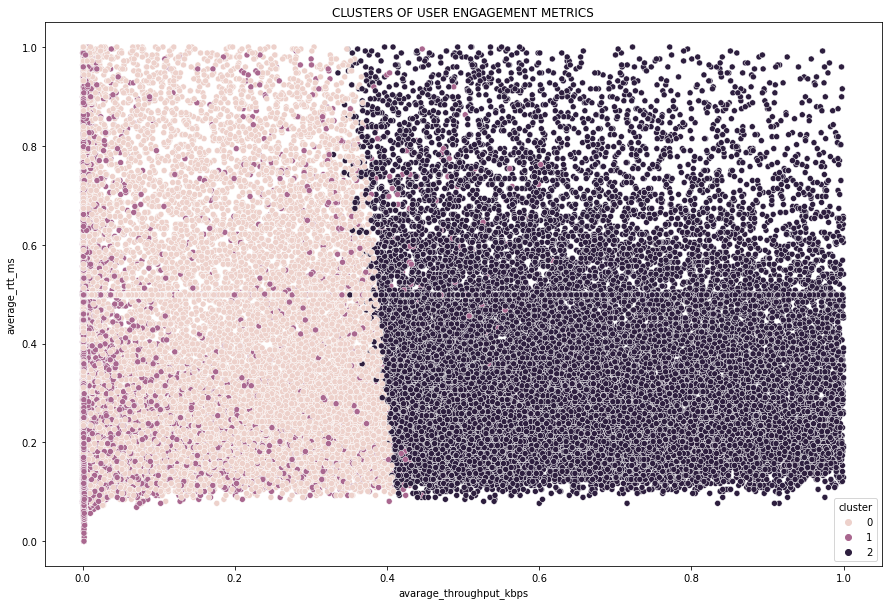

In [82]:
normalized_experience_metrics['cluster'] = predictions
plt.figure(figsize=(15, 10))

sns.scatterplot(x = 'avarage_throughput_kbps', y = 'average_rtt_ms', hue = 'cluster', data = normalized_experience_metrics).set_title("CLUSTERS OF USER ENGAGEMENT METRICS")

plt.show()

In [83]:
# SAVE THE USER EXEPRIENCE MATRIX
assistant.save_csv(user_experience_metrics_with_cluster, '../data/user_exeperience_metrix.csv')

File Successfully Saved.!!!


,msisdnum,tcp_retrans_bytes,average_rtt_ms,handset_type,avarage_throughput_kbps,cluster
0,3.366496e+10,2.182528e+07,47.000000,Samsung Galaxy A5 Sm-A520F,67.0,1
1,3.368185e+10,2.182528e+07,70.000000,Samsung Galaxy J5 (Sm-J530),42.0,1
2,3.376063e+10,2.182528e+07,123.593439,Samsung Galaxy A8 (2018),15.0,1
3,3.375034e+10,2.182528e+07,123.593439,undefined,88.0,1
4,3.369980e+10,2.182528e+07,123.593439,Samsung Sm-G390F,15.0,1
...,...,...,...,...,...,...
146886,3.366865e+10,1.671546e+07,322.000000,undefined,64813.0,1
146887,3.365069e+10,2.182528e+07,32.000000,Apple iPhone 8 Plus (A1897),117.0,1
146888,3.366345e+10,2.182528e+07,29.000000,Apple iPhone Se (A1723),77.0,1
146889,3.362189e+10,2.182528e+07,49.000000,Apple iPhone Xs (A2097),90.0,1
